# Digit Recognition (MNIST Dataset)

In [1]:
# Import all the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

Since dataset is imported from kaggle ,an api token should be created which produces a .JSON file

In [2]:
# The .JSON file should be kept in /kaggle directory to work

! pip install kaggle         # install kaggle 

! mkdir ~/.kaggle            # create a directory named kaggle

! cp kaggle.json ~/.kaggle/  # place .JSON file in created directory

! chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Now download the dataset of a perticular compitation

! kaggle competitions download digit-recognizer

 82% 5.00M/6.09M [00:00<00:00, 18.9MB/s]
100% 6.09M/6.09M [00:00<00:00, 17.5MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 74.6MB/s]
 76% 7.00M/9.16M [00:00<00:00, 24.8MB/s]
100% 9.16M/9.16M [00:00<00:00, 30.5MB/s]


In [4]:
# The downloaded dataset will be in zip format, so unzip it
! unzip  train.csv.zip
! unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [5]:
# Read csv file and store it in a variable
x=pd.read_csv("train.csv")


In [6]:
# Lok into the data

x.shape


(42000, 785)

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
x.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [9]:
x.isna().any()

label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 785, dtype: bool

In [10]:

# make x and y split
x_train=x.drop(labels="label",axis=1)
y_train=x.loc[:,["label"]]



In [11]:
# Normalize the data
x_train=x_train/250.0

In [12]:
# Build a dense neural network with 784 input
# 5 layer network with softmax classifier at the end

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(5000, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
# C0mpile the model with adam optimizer

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Split the test and train data

x_train,x_test, y_train,y_test = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

In [15]:
x_train.shape,y_train.shape

((33600, 784), (33600, 1))

In [16]:
# Train the model for 50 epoch

data = model.fit(x_train, y_train, epochs=50,batch_size=3360, validation_data=(x_test,y_test))

Epoch 1/50
10/10 [==============================] - 9s 795ms/step - loss: 1.1669 - accuracy: 0.6596 - val_loss: 0.5585 - val_accuracy: 0.8275
Epoch 2/50
10/10 [==============================] - 8s 758ms/step - loss: 0.4255 - accuracy: 0.8734 - val_loss: 0.3317 - val_accuracy: 0.9013
Epoch 3/50
10/10 [==============================] - 8s 771ms/step - loss: 0.2845 - accuracy: 0.9164 - val_loss: 0.2508 - val_accuracy: 0.9269
Epoch 4/50
10/10 [==============================] - 8s 767ms/step - loss: 0.2164 - accuracy: 0.9359 - val_loss: 0.2007 - val_accuracy: 0.9414
Epoch 5/50
10/10 [==============================] - 8s 765ms/step - loss: 0.1738 - accuracy: 0.9477 - val_loss: 0.1690 - val_accuracy: 0.9483
Epoch 6/50
10/10 [==============================] - 8s 777ms/step - loss: 0.1419 - accuracy: 0.9580 - val_loss: 0.1464 - val_accuracy: 0.9551
Epoch 7/50
10/10 [==============================] - 8s 777ms/step - loss: 0.1187 - accuracy: 0.9647 - val_loss: 0.1300 - val_accuracy: 0.9605
Epoch 

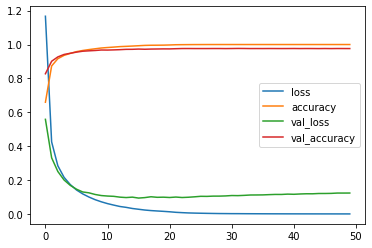

In [17]:
# Ploting the result , accuracy,loss

pd.DataFrame(data.history).plot()

In [47]:
# importing test set prediction 

test=pd.read_csv("test.csv")
prediction = model.predict(test)
prediction = np.argmax(prediction, axis=1)



In [48]:
# Creating submission data frame

submission = {"ImageId": [i+1 for i in range(28000)],"Label": final_pred}

submission= pd.DataFrame(submission_dict)

submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [49]:
# Creating csv file which as all prediction and image id which can be verified in kaggle
submission.to_csv("submission.csv", index=False)